# **Machine Learning Project**

**Medical Insurance Cost Prediction**

* You must have heard some advertisements regarding medical insurance that promises to help financially in case of any medical emergency. One who purchases this type of insurance has to pay premiums monthly and this premium amount varies vastly depending upon various factors.
 here, we will try to extract some insights from a dataset that contains details about the background of a person who is purchasing medical insurance along with what amount of premium is charged to those individuals as well using Machine Learning in Python.

**Importing Libraries and Dataset**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [ ]:
data = pd.read_csv("/content/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data.shape

(1338, 7)

*This dataset contains 1338 data points with 6 independent features and 1 target feature(charges).*

**Exploring the data**

In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
data.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Exploratory Data Analysis:**






* Analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations.
 While performing the EDA of this dataset we will try to look at what is the relation between the independent features that is how one affects the other.*

*1. Pie chart for the sex, smoker, and region column*

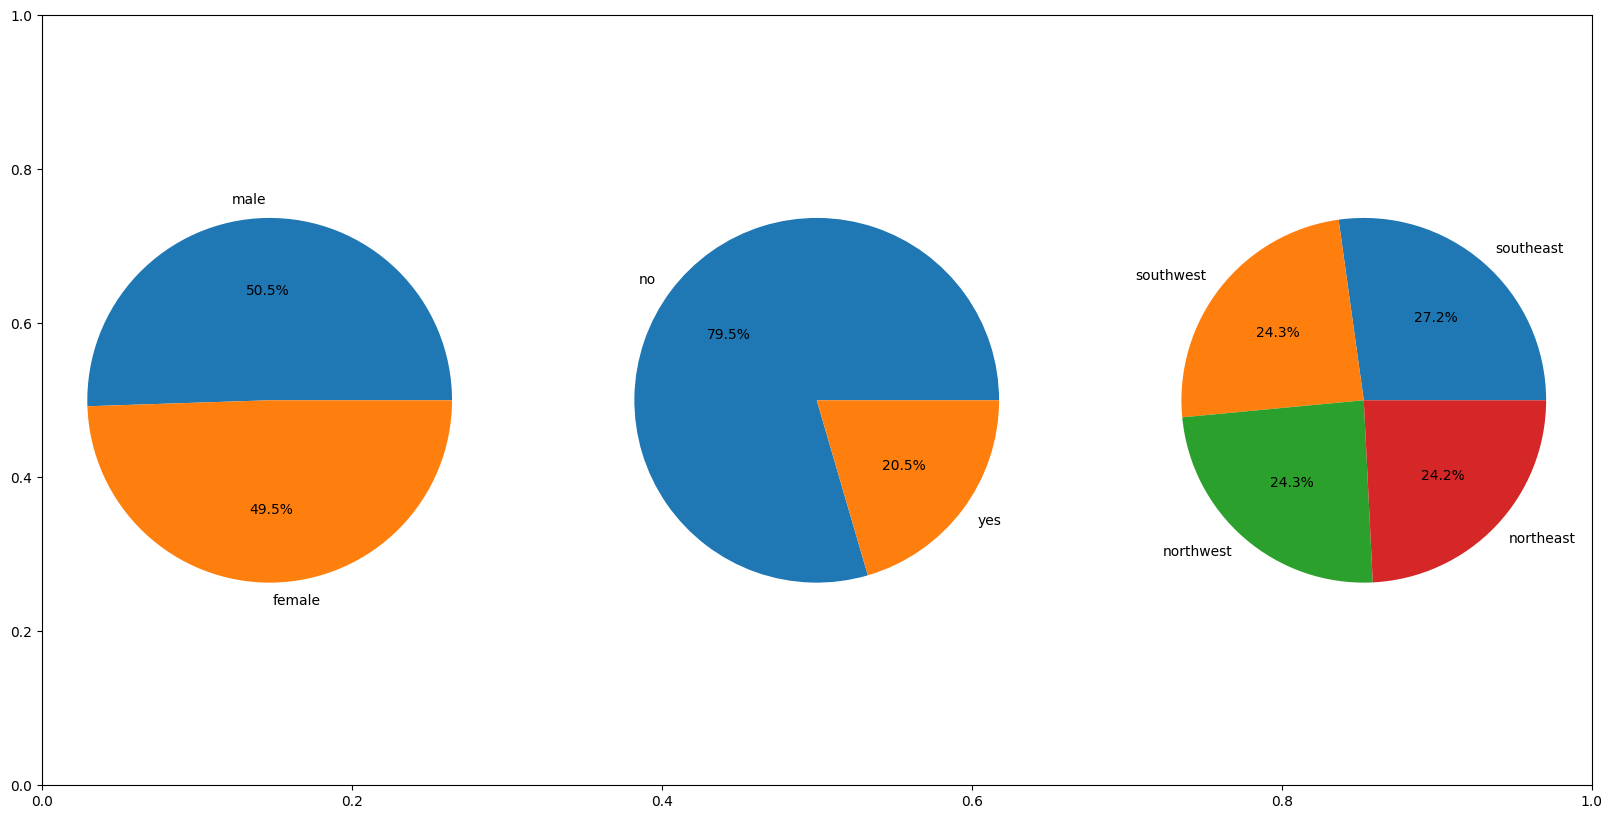

In [ ]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

*The data provided to us is equally distributed among the sex and the region columns but in the smoker column, we can observe a ratio of 80:20.*

*2.Comparison between charges paid between different groups*

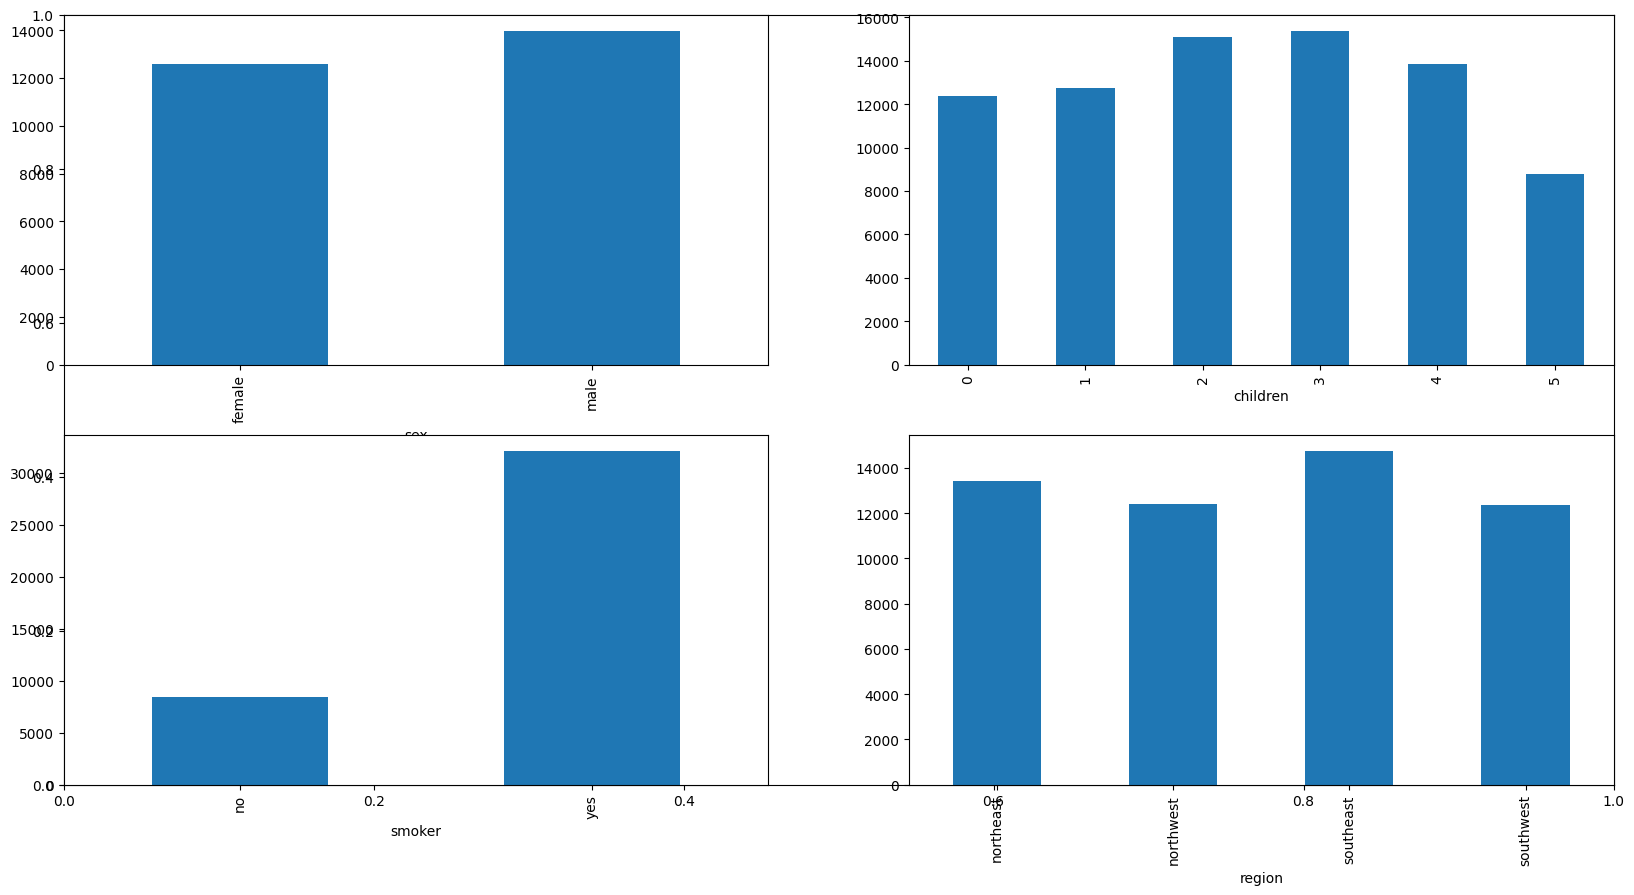

In [ ]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    data.groupby(col)['charges'].mean().astype(float).plot.bar()
plt.show()

Now let’s check some of the observations which are shown in the above graphs:

   1.Charges are on the higher side for males as compared to females but the difference is not that much.
   2.Premium charged from the smoker is around thrice that which is charged from non-smokers.
   3.Charges are approximately the same in the given four regions.*

*3.Scatter plot of the charges paid v/s age and BMI respectively*

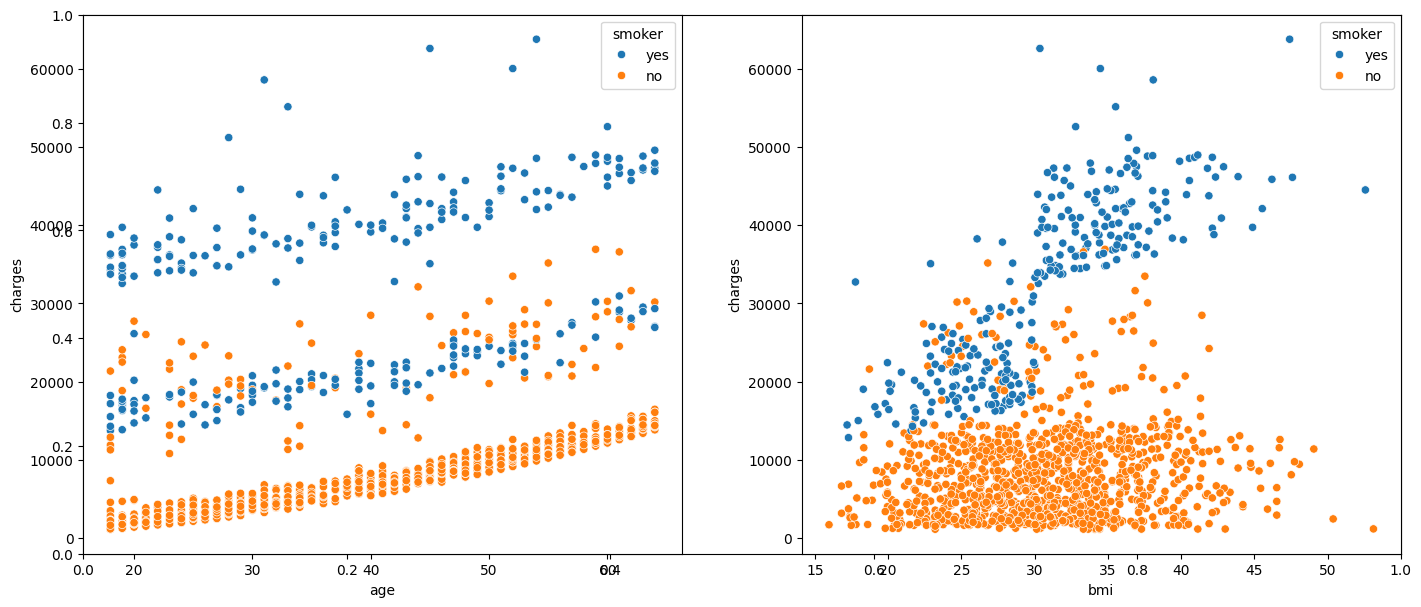

In [ ]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col,
                   y='charges',
                   hue='smoker')
plt.show()

 A clear distinction can be observed here between the charges that smokers have to pay. Also here as well we can observe that as the age of a person increases premium prices goes up as well.


**Data Preprocessing**

Cleaning the unusual data like the missing values,wrong data,wrong format of data,duplicated data and the outliers.In this data we can observe that there are no missing values and wrong data.The only thing we can need to check is for duplicates and presence of outliers.

<Axes: ylabel='age'>

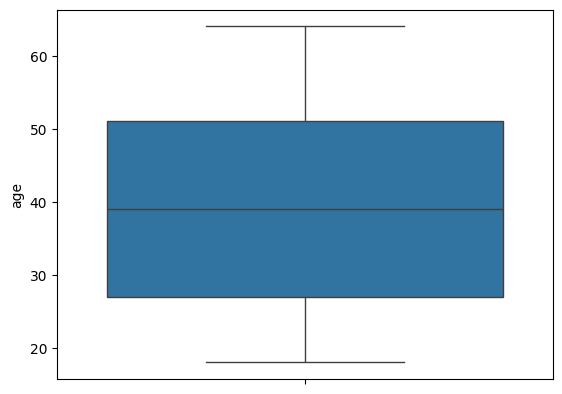

In [ ]:
data.drop_duplicates(inplace=True)
sns.boxplot(data['age'])

we can see that there are no outliers present in age column

<Axes: ylabel='bmi'>

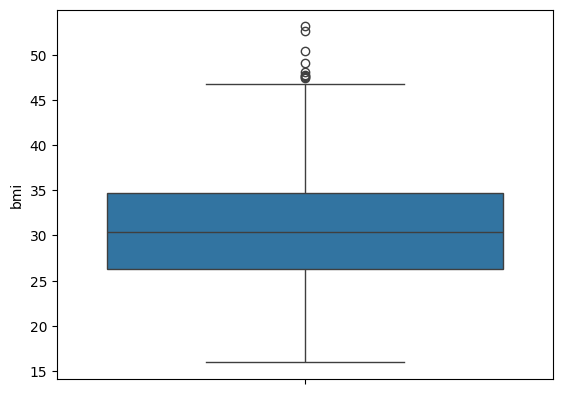

In [ ]:
sns.boxplot(data['bmi'])

Due to the presence of outliers present in bmi column we need to treat the outliers by replacing the values with mean as the bmi column consists of continuous data.

In [ ]:
bmi_mean = data['bmi'].mean()

# Define outliers using the IQR method
Q1 = data['bmi'].quantile(0.25)  # First quartile
Q3 = data['bmi'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1

# Define the lower and upper bounds for non-outlier values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the mean
data['bmi'] = data['bmi'].apply(lambda x: bmi_mean if x < lower_bound or x > upper_bound else x)

print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]


<Axes: ylabel='bmi'>

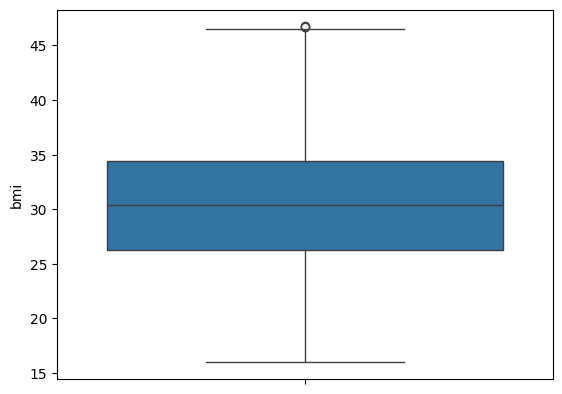

In [ ]:
sns.boxplot(data['bmi'])

Now, Checking the data skewness to ensure whether the data follow normal or standard distribution and encode the discrete data for prediction.

In [ ]:
data['bmi'].skew()

0.1572382226470368

In [ ]:
data['age'].skew()

0.054780773126998195

Data in both the age and BMI column approximately follow a Normal distribution which is a good point with respect to the model’s learning.

**Data Cleaning and Preprocessing:-**

In [ ]:
dummies = pd.get_dummies(data["region"])  #Feature Engineering
dummies

,northeast,northwest,southeast,southwest
0,False,False,False,True
1,False,False,True,False
2,False,False,True,False
3,False,True,False,False
4,False,True,False,False
...,...,...,...,...
1333,False,True,False,False
1334,True,False,False,False
1335,False,False,True,False
1336,False,False,False,True


In [ ]:
merge = pd.concat([dummies,data],axis=1)
merge

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,region,charges
0,False,False,False,True,19,female,27.900,0,yes,southwest,16884.92400
1,False,False,True,False,18,male,33.770,1,no,southeast,1725.55230
2,False,False,True,False,28,male,33.000,3,no,southeast,4449.46200
3,False,True,False,False,33,male,22.705,0,no,northwest,21984.47061
4,False,True,False,False,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...
1333,False,True,False,False,50,male,30.970,3,no,northwest,10600.54830
1334,True,False,False,False,18,female,31.920,0,no,northeast,2205.98080
1335,False,False,True,False,18,female,36.850,0,no,southeast,1629.83350
1336,False,False,False,True,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
merge=merge.drop(["region"],axis=1)
merge

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,False,False,False,True,19,female,27.900,0,yes,16884.92400
1,False,False,True,False,18,male,33.770,1,no,1725.55230
2,False,False,True,False,28,male,33.000,3,no,4449.46200
3,False,True,False,False,33,male,22.705,0,no,21984.47061
4,False,True,False,False,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,False,True,False,False,50,male,30.970,3,no,10600.54830
1334,True,False,False,False,18,female,31.920,0,no,2205.98080
1335,False,False,True,False,18,female,36.850,0,no,1629.83350
1336,False,False,False,True,21,female,25.800,0,no,2007.94500


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
obj1 = LabelEncoder()
obj2 = LabelEncoder()

In [ ]:
merge["sex"] = obj1.fit_transform(merge["sex"])
merge["smoker"] = obj2.fit_transform(merge["smoker"])
merge

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker,charges
0,False,False,False,True,19,0,27.900,0,1,16884.92400
1,False,False,True,False,18,1,33.770,1,0,1725.55230
2,False,False,True,False,28,1,33.000,3,0,4449.46200
3,False,True,False,False,33,1,22.705,0,0,21984.47061
4,False,True,False,False,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,False,True,False,False,50,1,30.970,3,0,10600.54830
1334,True,False,False,False,18,0,31.920,0,0,2205.98080
1335,False,False,True,False,18,0,36.850,0,0,1629.83350
1336,False,False,False,True,21,0,25.800,0,0,2007.94500


**Correlation**

Visually showing the relationships between numerical variables using colors to indicate the strength and direction of the correlation

In [ ]:
correlation_matrix = merge.corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
           northeast  northwest  southeast  southwest       age       sex  \
northeast   1.000000  -0.319842  -0.345909  -0.320493  0.001868 -0.002008   
northwest  -0.319842   1.000000  -0.345909  -0.320493  0.001495 -0.012482   
southeast  -0.345909  -0.345909   1.000000  -0.346614 -0.012311  0.017578   
southwest  -0.320493  -0.320493  -0.346614   1.000000  0.009415 -0.003767   
age         0.001868   0.001495  -0.012311   0.009415  1.000000 -0.019814   
sex        -0.002008  -0.012482   0.017578  -0.003767 -0.019814  1.000000   
bmi        -0.135959  -0.128701   0.254189   0.000610  0.114385  0.039879   
children   -0.023202   0.026044  -0.023492   0.021538  0.041536  0.017848   
smoker      0.002597  -0.036321   0.068282  -0.037168 -0.025587  0.076596   
charges     0.005945  -0.038695   0.073578  -0.043637  0.298308  0.058044   

                bmi  children    smoker   charges  
northeast -0.135959 -0.023202  0.002597  0.005945  
northwest -0.128701  0.02604

Heatmap

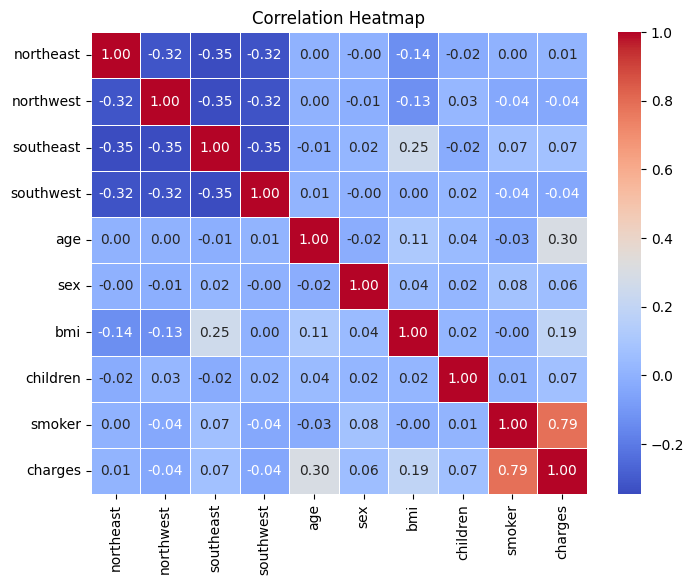

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Model Development**

There are so many state-of-the-art ML models available in academia but some model fits better to some problem while some fit better than other. So, to make this decision we split our data into training and validation data. Then we use the validation data to choose the model with the highest performance.

After dividing the data into training and validation data it is considered a better practice to achieve stable and fast training of the model.We have identified the best random_state number for this data set as 42 .Now we fix this random_state and try with different ml algorithms for better score or accuracy.



In [ ]:
X=merge.drop(['charges'],axis=1)
Y=merge[['charges']]

In [ ]:
X

,northeast,northwest,southeast,southwest,age,sex,bmi,children,smoker
0,False,False,False,True,19,0,27.900,0,1
1,False,False,True,False,18,1,33.770,1,0
2,False,False,True,False,28,1,33.000,3,0
3,False,True,False,False,33,1,22.705,0,0
4,False,True,False,False,32,1,28.880,0,0
...,...,...,...,...,...,...,...,...,...
1333,False,True,False,False,50,1,30.970,3,0
1334,True,False,False,False,18,0,31.920,0,0
1335,False,False,True,False,18,0,36.850,0,0
1336,False,False,False,True,21,0,25.800,0,0


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=42)
print(len(xtrain))
print(len(xtest))

1069
268


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
lrmodel=LinearRegression()
lrmodel.fit(xtrain,ytrain)
ypredtrain1=lrmodel.predict(xtrain)
ypredtest1=lrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))

print(cross_val_score(lrmodel,X,Y,cv=5,).mean())

0.7304158662426424
0.799716914252622
0.745391954258549


**SVR**

In [ ]:
from sklearn.svm import SVR
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain2=svrmodel.predict(xtrain)
ypredtest2=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain2))
print(r2_score(ytest,ypredtest2))
print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.10154746792577085
-0.1344636220836557


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

-0.10378423912387787


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfmodel=RandomForestRegressor(random_state=42)
rfmodel.fit(xtrain,ytrain)
ypredtrain3=rfmodel.predict(xtrain)
ypredtest3=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9741576057166101
0.8793940358248458


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

0.8353103119259085


Hyper Parameter Tuning in Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=RandomForestRegressor(random_state=42)
param_grid={'n_estimators':[10,40,50,98,100,120,150]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

{'n_estimators': 150}


In [ ]:
rfmodel=RandomForestRegressor(random_state=42,n_estimators=150)
rfmodel.fit(xtrain,ytrain)
ypredtrain3=rfmodel.predict(xtrain)
ypredtest3=rfmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain3))
print(r2_score(ytest,ypredtest3))
print(cross_val_score(rfmodel,X,Y,cv=5,).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.975595631234424
0.8798587673133401


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

0.8362723331824906


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gbmodel=GradientBoostingRegressor()
gbmodel.fit(xtrain,ytrain)
ypredtrain4=gbmodel.predict(xtrain)
ypredtest4=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

0.8914389299931227
0.896084809189244


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

0.8520242343262646


Hyper Parameter Tuning in Gradient Boosting

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=GradientBoostingRegressor()
param_grid={'n_estimators':[10,15,19,20,21,50],'learning_rate':[0.1,0.19,0.2,0.21,0.8,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

{'learning_rate': 0.2, 'n_estimators': 20}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [ ]:
gbmodel=GradientBoostingRegressor(n_estimators=20,learning_rate=0.2)
gbmodel.fit(xtrain,ytrain)
ypredtrain4=gbmodel.predict(xtrain)
ypredtest4=gbmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(gbmodel,X,Y,cv=5,).mean())

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


0.8688059114769326
0.897281928625612


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a

0.8587836773298921


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


**XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain5=xgmodel.predict(xtrain)
ypredtest5=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain5))
print(r2_score(ytest,ypredtest5))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.9953277111053467
0.8621174097061157
0.8127255082130432


Hyper Parameter Tuning in XGBoost Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)

{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [ ]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain5=xgmodel.predict(xtrain)
ypredtest5=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain5))
print(r2_score(ytest,ypredtest5))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.8693346381187439
0.9027097225189209
0.8609473824501037


**Comapring All Models**

In [ ]:
model_selection = {"Models" : ["Linear Regression","Support Vector Regressor","Random Forest Regressor",
                            "Gradient Boost Regressor","XGBoost Regressor"],
      " Train Accuracy" : [0.730,-0.101,0.975,0.868,0.869],
      "Test Accuracy" : [0.799,-0.134,0.879,0.879,0.902],
      "CV Score" : [0.745,-0.103,0.836,0.858,0.860]}
df = pd.DataFrame(model_selection)
df

,Models,Train Accuracy,Test Accuracy,CV Score
0,Linear Regression,0.730,0.799,0.745
1,Support Vector Regressor,-0.101,-0.134,-0.103
2,Random Forest Regressor,0.975,0.879,0.836
3,Gradient Boost Regressor,0.868,0.879,0.858
4,XGBoost Regressor,0.869,0.902,0.860


From the above table we can observe that XGBoost is the best model.Now we need to identify the important features for predicting of charges.

In [ ]:
features=pd.DataFrame(data=grid.best_estimator_.feature_importances_,index=X.columns,columns=['Importance'])
features

,Importance
northeast,0.005534
northwest,0.004154
southeast,0.000000
southwest,0.004106
age,0.039362
sex,0.004614
bmi,0.096240
children,0.010950
smoker,0.835039


In [ ]:
important_features=features[features['Importance']>0.01]
important_features

,Importance
age,0.039362
bmi,0.096240
children,0.010950
smoker,0.835039


In [ ]:
print(merge)

      northeast  northwest  southeast  southwest  age  sex     bmi  children  \
0         False      False      False       True   19    0  27.900         0   
1         False      False       True      False   18    1  33.770         1   
2         False      False       True      False   28    1  33.000         3   
3         False       True      False      False   33    1  22.705         0   
4         False       True      False      False   32    1  28.880         0   
...         ...        ...        ...        ...  ...  ...     ...       ...   
1333      False       True      False      False   50    1  30.970         3   
1334       True      False      False      False   18    0  31.920         0   
1335      False      False       True      False   18    0  36.850         0   
1336      False      False      False       True   21    0  25.800         0   
1337      False       True      False      False   61    0  29.070         0   

      smoker      charges  
0          

**Final Model**

In [ ]:
merge.drop(merge[['sex','northeast','northwest','southeast','southwest']],axis=1,inplace=True)
Xf=merge.drop(merge[['charges']],axis=1)
X=merge.drop(merge[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())

0.8678604364395142
0.8995317220687866
0.8595657825469971


**Predict on New Data**

In [ ]:
new_data=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)
finalmodel.predict(new_data)

array([17535.662], dtype=float32)

**Conclusion**

**Out of all the models XGBoost model is giving the highest accuracy this means predictions made by this model are close to the real values as compared to the other model.**